<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_Improved_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [2]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()    # targets are 2-D arrays, (N x 1) instead of N
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()         # TensorFlow expects 1-D array as targets
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 [==============================] - 14s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
# Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model using the functional API
# Changes: convolutions with no strides, and multiple convolutions before max pooling (VGG)

i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile and fit
# Note: make sure you use the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 29s 9ms/step - loss: 1.3245 - accuracy: 0.5450 - val_loss: 1.0152 - val_accuracy: 0.6475
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8579 - accuracy: 0.7040 - val_loss: 0.8479 - val_accuracy: 0.7084
Epoch 3/50
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7007 - accuracy: 0.7589 - val_loss: 0.7348 - val_accuracy: 0.7542
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5927 - accuracy: 0.7974 - val_loss: 0.7312 - val_accuracy: 0.7557
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4989 - accuracy: 0.8288 - val_loss: 0.6532 - val_accuracy: 0.7882
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4232 - accuracy: 0.8532 - val_loss: 0.7289 - val_accuracy: 0.7761
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3567 - accuracy: 0.8779 - val_loss: 0.6080 - val_ac

In [7]:
# Fit with data augmentation -- vertical/horizontal shifts, horizontal flip
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.5595 - accuracy: 0.8197 - val_loss: 0.4875 - val_accuracy: 0.8382
Epoch 2/50
1562/1562 [==============================] - 38s 25ms/step - loss: 0.4427 - accuracy: 0.8541 - val_loss: 0.5174 - val_accuracy: 0.8275
Epoch 3/50
1562/1562 [==============================] - 48s 30ms/step - loss: 0.4078 - accuracy: 0.8629 - val_loss: 0.4844 - val_accuracy: 0.8442
Epoch 4/50
1562/1562 [==============================] - 40s 25ms/step - loss: 0.3894 - accuracy: 0.8708 - val_loss: 0.4510 - val_accuracy: 0.8543
Epoch 5/50
1562/1562 [==============================] - 50s 32ms/step - loss: 0.3739 - accuracy: 0.8751 - val_loss: 0.4607 - val_accuracy: 0.8553
Epoch 6/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.3625 - accuracy: 0.8778 - val_loss: 0.4472 - val_accuracy: 0.8563
Epoch 7/50
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3443 - accuracy: 0.8824 - val_loss: 0.4672 -

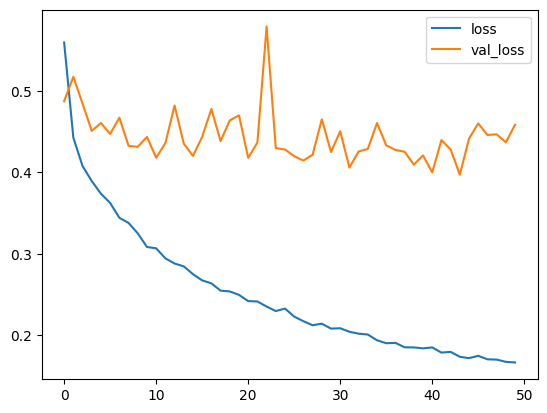

In [8]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

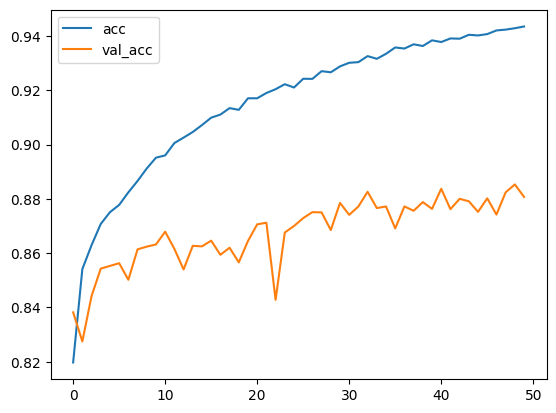

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[904  10  21   4   9   1   2   6  38   5]
 [  4 969   1   1   0   0   2   0   9  14]
 [ 30   3 862  16  25  18  25  10   8   3]
 [ 17   9  56 732  31  67  38  26  16   8]
 [  6   4  35  18 863   8  31  28   7   0]
 [  6   5  38  87  26 792  16  26   2   2]
 [  6   4  30  21   8   3 917   5   3   3]
 [ 10   1  14  13  17  11   1 931   0   2]
 [ 25  19   4   2   1   0   0   1 941   7]
 [ 13  74   1   4   1   1   1   1   8 896]]


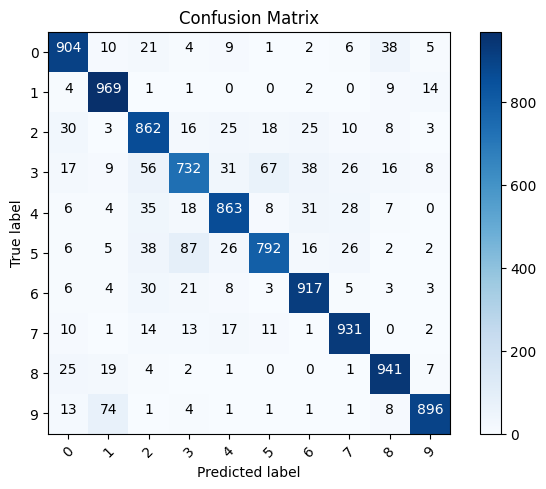

In [10]:
# Plot confusion matrix

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
# Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

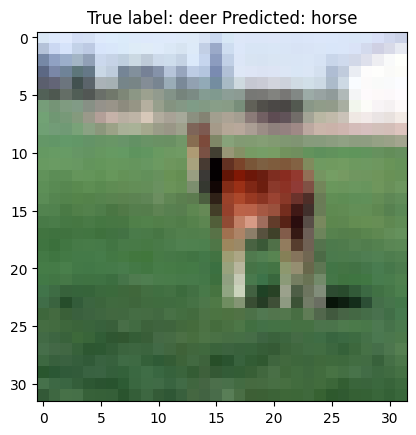

In [19]:
# Show some misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));   # Show true label vs. what it was mistaken as